### Calculate the bedding orientation and stratigraphic thickness from 3D point coordinates
Given three points (p1, p2, p3) of a bedding surface the equation of the plane (Ax +By + Cz + D = 0) is calculated. Given another point (p0) from another surface the stratigraphic thickness is  calculated.

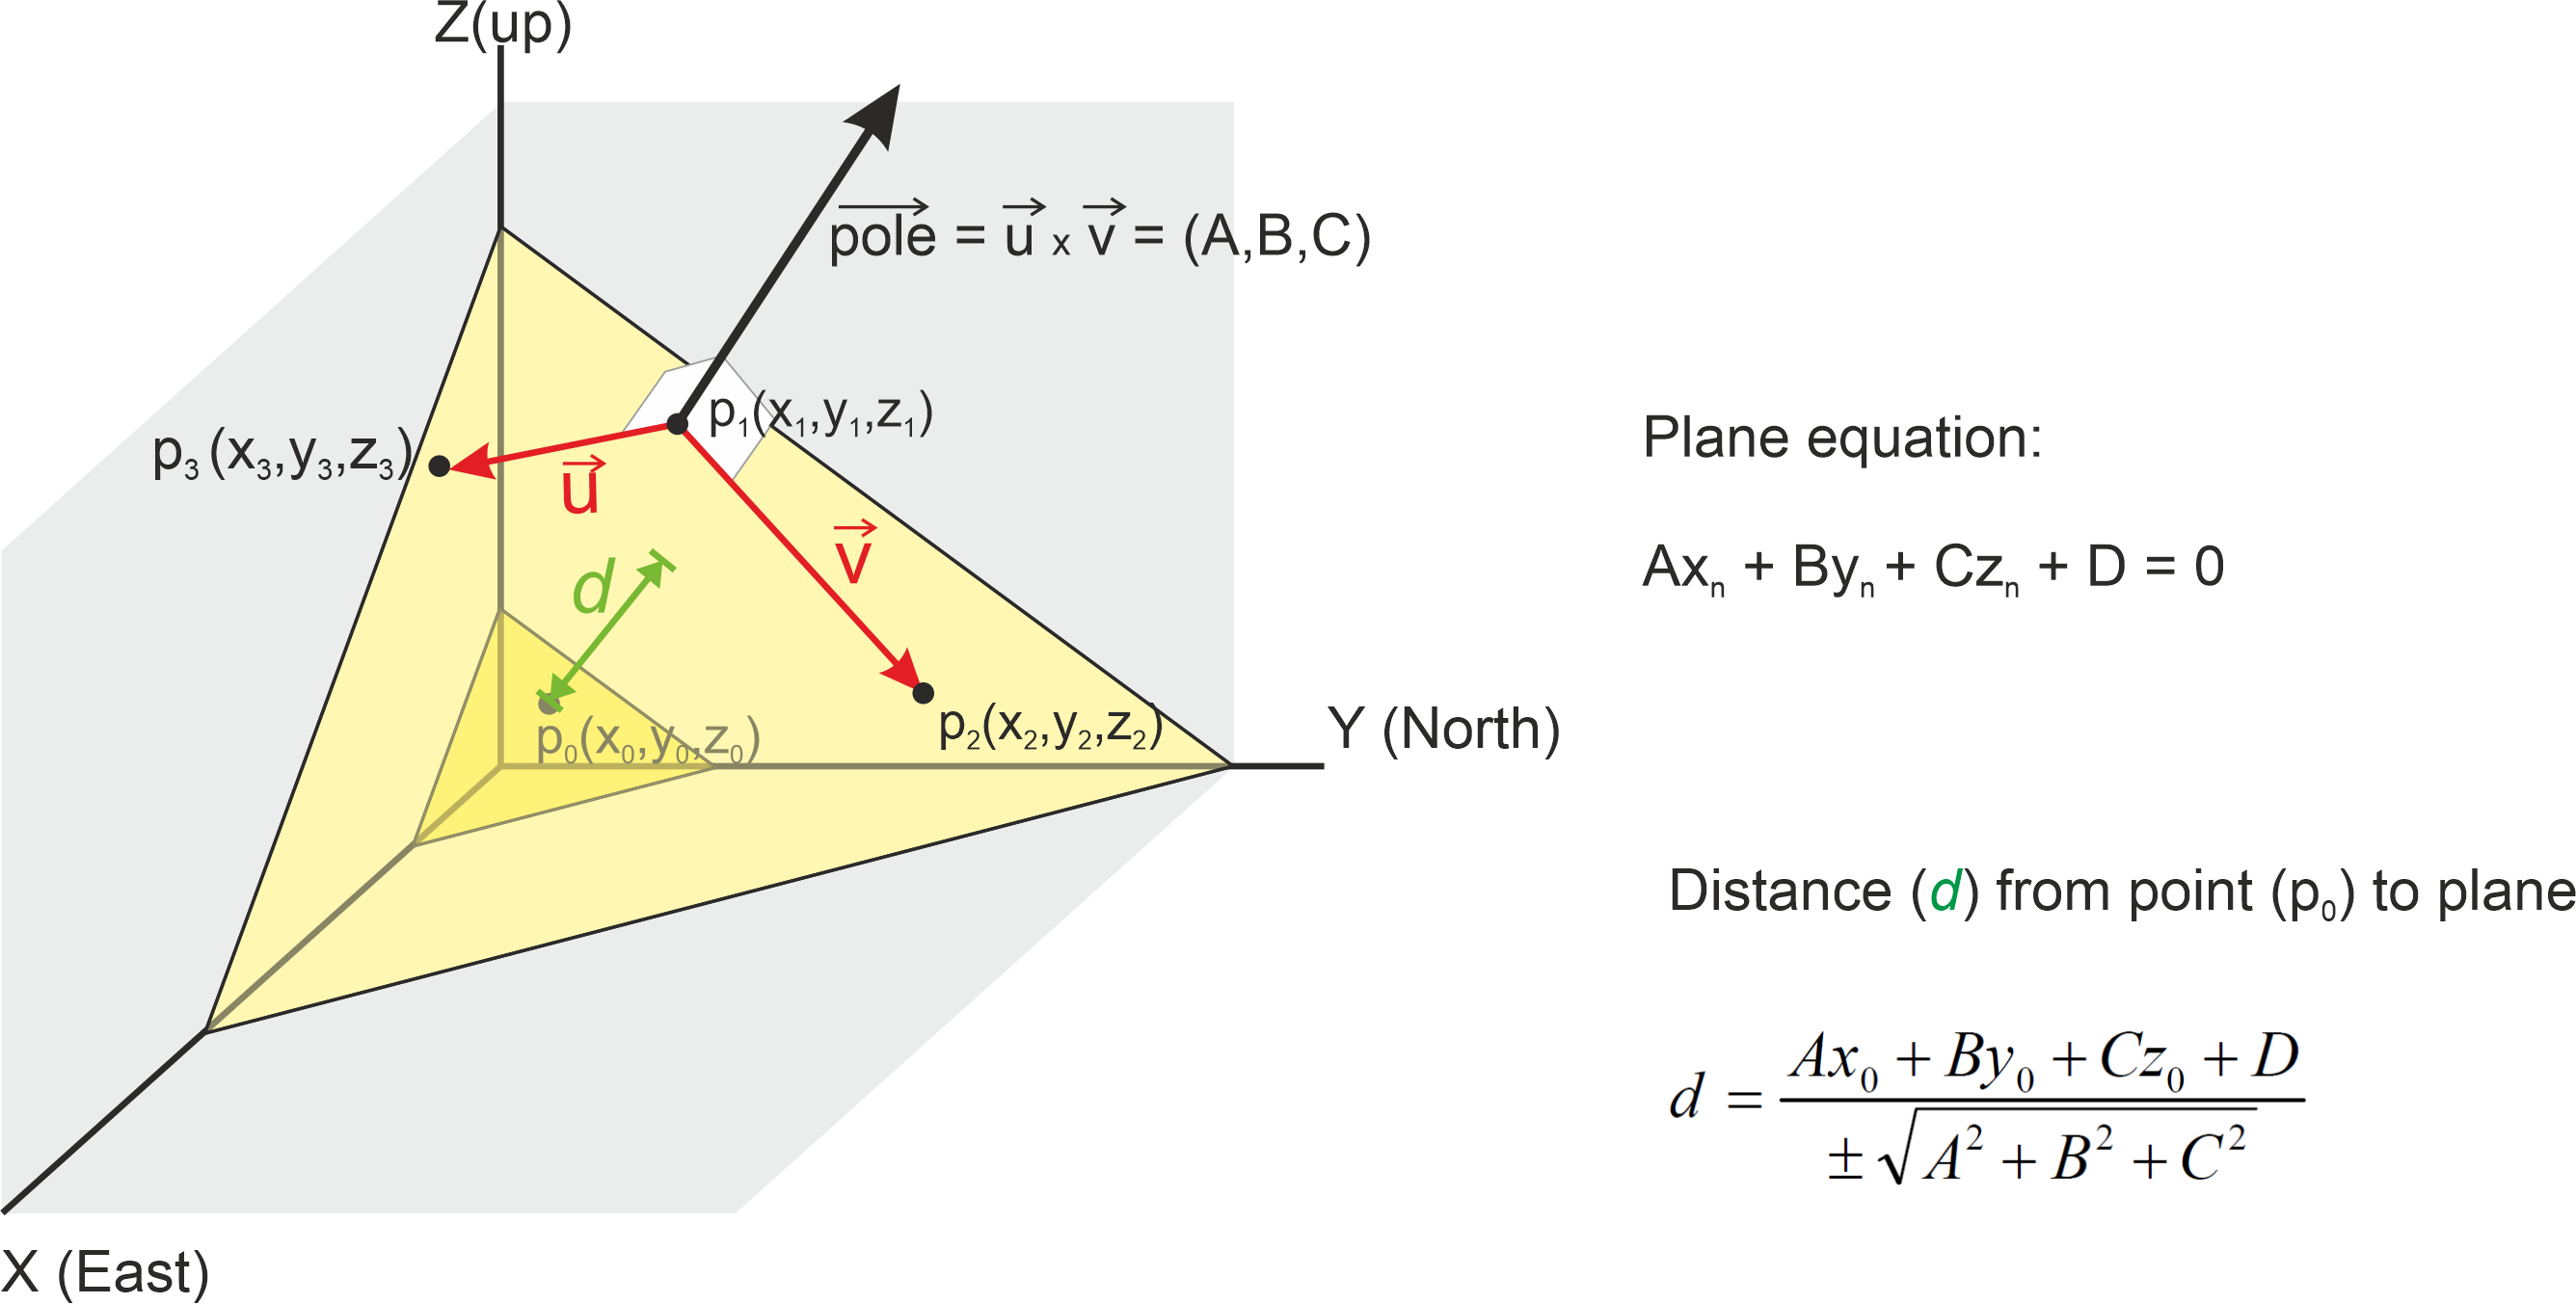

In [1]:
import numpy as np
import pandas as pd
class color:
   RED = '\033[91m'
   BOLD = '\033[1m'
   END = '\033[0m'

### 0. Data input

In [2]:
#Read excel spreadsheet with coordinates of points (East, North, altitude)
from tkinter import *
from tkinter import filedialog
# Create Tk root
root = Tk()
# Hide the main window
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)

filename = filedialog.askopenfilename(filetypes = (('excel XLSX', '*.xlsx'),('excel XLS', '*.xls'))) 
print(filename)
waypoints = pd.read_excel(filename, index_col=0)
waypoints.round()

C:/Users/mgarc/OneDrive - Universitat de Barcelona/GitHub/stratigraphy/punts.xlsx


,xcoord,ycoord,zcoord
label,,,
base,409277.0,4620267.0,277.0
top,409145.0,4620868.0,301.0
limestone1,409363.0,4620733.0,283.0
limestone2,409161.0,4620678.0,274.0
limestone3,409254.0,4620505.0,292.0


In [18]:
# unmark to enter points manually
'''
# Enter three points defining the plane, and points at the base and top
waypoints = pd.DataFrame(columns = ("x","y","z"), index = ("wp1","wp2","wp3",'base','top'))
for index in range(5):
    for col in range(3):
        waypoints.iloc[index,col] = float(input('{0} coordenada {1}: '.format( waypoints.index[index], waypoints.columns[col])))

waypoints
'''

'\n# Enter three points defining the plane, and points at the base and top\nwaypoints = pd.DataFrame(columns = ("x","y","z"), index = ("wp1","wp2","wp3",\'base\',\'top\'))\nfor index in range(5):\n    for col in range(3):\n        waypoints.iloc[index,col] = float(input(\'{0} coordenada {1}: \'.format( waypoints.index[index], waypoints.columns[col])))\n\nwaypoints\n'

In [19]:
#If need to correct some input data
'''
waypoints['z']['wp2'] = 200
waypoints
'''

"\nwaypoints['z']['wp2'] = 200\nwaypoints\n"

### 1. Given the coordinates (xyz) of three points p1, p2 and p3, calculate the equation of the plane.

In [11]:
# Given three points defining the plane...(by default, the first 3 points in the dataframe)
p1 = np.array(waypoints.iloc[0],dtype=float) #point 1 coordinates: x1(East), y1(North), z1
p2 = np.array(waypoints.iloc[1],dtype=float) #point 2 coordinates: x2(East), y2(North), z2
p3 = np.array(waypoints.iloc[2],dtype=float) #point 3 coordinates:x3(East), y3(North), z3

# Calculate two vectors defining the plane
u = p3 - p1
v = p2 - p1

# the cross product is a vector normal to the plane
pole = np.cross(u, v)
if pole[2]>0:
    pole = -pole
A, B, C = pole

# This evaluates A*x3 + B*y3 + C*z3 which equals -D
D = - np.dot(pole, p3)

print(color.BOLD+'The equation of the plane is {0}x + {1}y + {2}z + {3} = 0'.format(round(A),round(B),round(C),round(D)))


The equation of the plane is 33400.0x + -9000.0y + -41338.0z + 65000.0 = 0


### 2. Calculate the orientation of the plane(dipdir and dip).

In [12]:
# Calculate the pole of the plane (azimuth and dip) 
North_comp = B
East_comp = A
Z_comp = C
pole_azimuth = np.degrees(np.arctan2(East_comp,North_comp))
pole_dip = -np.degrees(np.arctan2(Z_comp, np.linalg.norm((North_comp,East_comp)))) #positive if downwards dip

# The  plane dip_dir is at 180 from the pole_azimuth
# The dip of the plane is 90 - the pole_dip.
if pole_azimuth < 180:
    dip_dir = (pole_azimuth +180).round()
else:
        dip_dir = (pole_azimuth - 180).round()
plane_dip = (90 - pole_dip).round()
print(color.BOLD + color.RED + 'The orientation of the plane (dipdir/dip) is {0:0>3}/{1:0>2}'.format(int(dip_dir), int(plane_dip)))


The orientation of the plane (dipdir/dip) is 285/40


### 3. Calculate the thickness from base to top given the bedding orientation given above

In [16]:
#Set manually the row index of the base and top
base = np.array(waypoints.loc['base']) #set manually row index of the base
top = np.array(waypoints.loc['top'])  #select row index of the top
print(waypoints)

#Calculate thickness from base to top
distance_to_top = (A*top[0]+B*top[1]+C*top[2]+D)/np.sqrt((A**2)+(B**2)+(C**2))
distance_to_base = (A*base[0]+B*base[1]+C*base[2]+D)/np.sqrt((A**2)+(B**2)+(C**2))
Thickness = np.abs(distance_to_top - distance_to_base)
print(color.BOLD + color.RED+ 'The thickness of the unit with bedding {0:0>3}/{1:0>2}(dipdir/dip) is {2} meters'.format(int(dip_dir), int(plane_dip), round(Thickness,2)))

        x    y    z
wp1   152  112  100
wp2   324  291  200
wp3   242  446  100
base  599  155  200
top   152  112  100
The thickness of the unit with bedding 285/40(dipdir/dip) is 193.11 meters
